In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
dados = pd.read_csv('OBIdados.csv')
dados

,Classif.,Nome,Escola,Cidade,Estado,NaN,Pontos,Ano
0,1,Michel Silva Machado,PUC-Rio,Rio de Janeiro,RJ,NF,0,1999
1,2,Daniel Felix Ferber,Instituto de Computação - UNICAMP,Campinas,SP,NF,0,1999
2,3,Andre Alberto Taffarello,DC/UFSCar,São Carlos,SP,NF,0,1999
3,4,Douglas Fabiano Vieira P. Silva,ICMC-USP,São Carlos,SP,NF,0,1999
4,5,Vinícius José Fortuna,Instituto de Computação - UNICAMP,Campinas,SP,NF,0,1999
...,...,...,...,...,...,...,...,...
1559,4,Kenzo Yves Yamashita Nobre,Universidade de São Paulo - ICMC,São Carlos,SP,0,460,2021
1560,4,Luiz Henrique Yuji Delgado Oda,Unicamp,Campinas,SP,0,460,2021
1561,4,Matheus Henrique de Sousa Silva,Unicamp,Campinas,SP,0,460,2021
1562,8,Abraão Caiana de Freitas,Universidade Federal de Campina Grande,Campina Grande,PB,0,438,2021


<AxesSubplot:title={'center':'Desempenho por estado'}, xlabel='Classif.', ylabel='Classif.'>

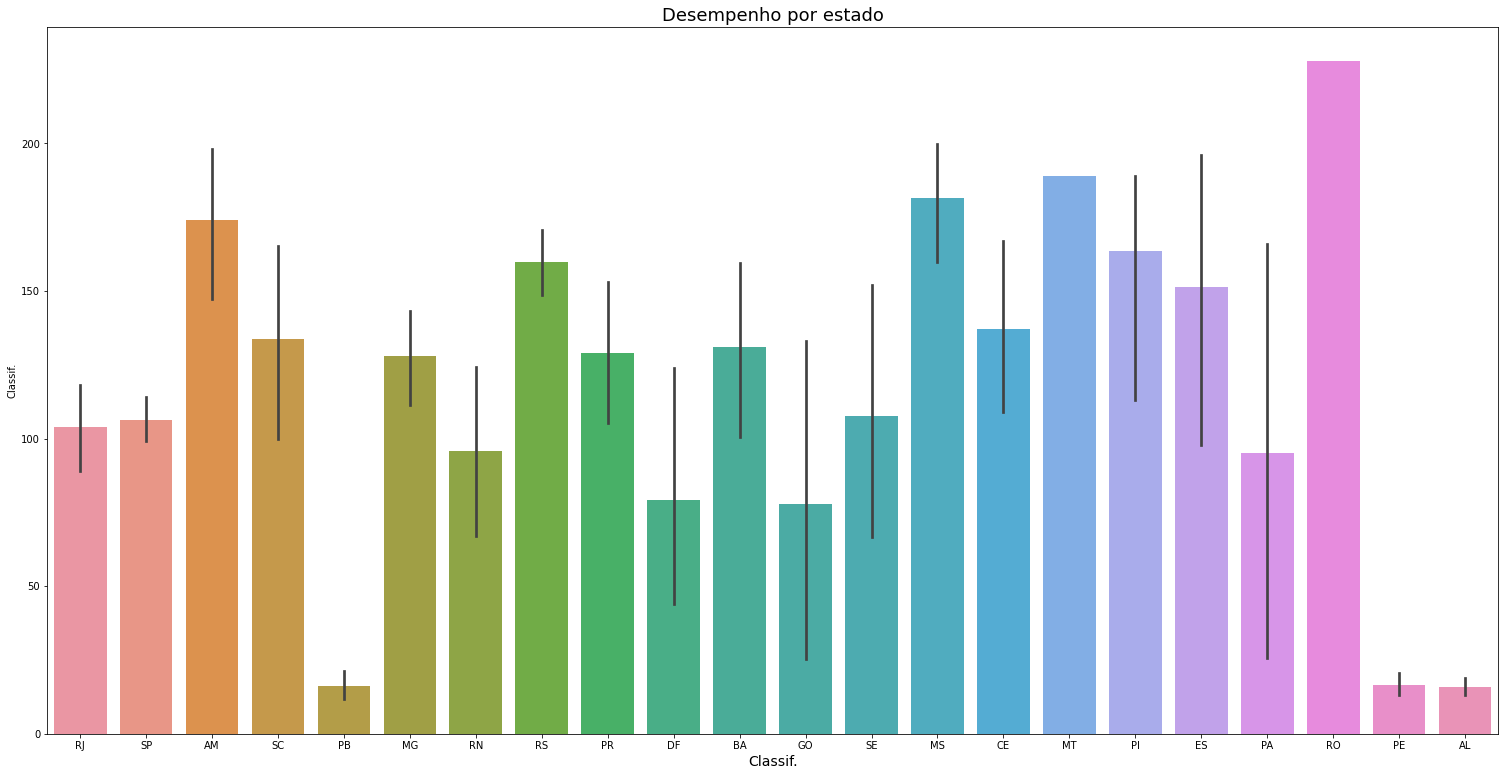

In [14]:
ax = sns.barplot(x = 'Estado', y ='Classif.' , data = dados)
ax.figure.set_size_inches(26,13)
ax.set_title('Desempenho por estado', fontsize=18)
ax.set_xlabel('Classif.',fontsize=14)
ax


In [15]:
#ax = sns.barplot(x = 'Cidade', y ='Classif.' , data = dados[dados.Estado == "MG"])
#ax.figure.set_size_inches(40,15)
#ax.set_title('Desempenho Minas', fontsize=18)
#ax.set_xlabel('Classif.',fontsize=14)
#ax
dados.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Columns: 8 entries, Classif. to Ano
dtypes: int64(3), object(5)
memory usage: 97.9+ KB


<AxesSubplot:title={'center':'Desempenho por escolas em uberlandia'}, xlabel='Classif.', ylabel='Classif.'>

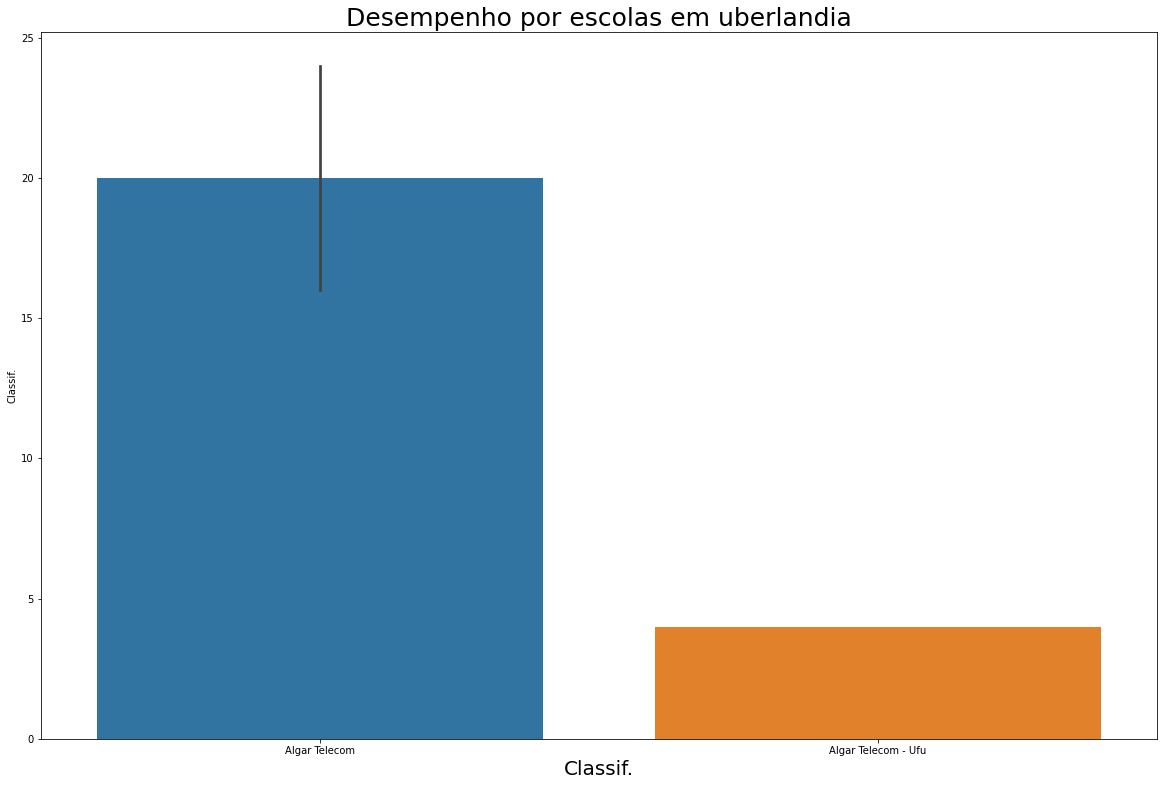

In [16]:
ax = sns.barplot(x = 'Escola', y ='Classif.' , data = dados[dados.Cidade == "Uberlândia"])
ax.figure.set_size_inches(20,13)
#ax.axes.invert_yaxis()
ax.set_title('Desempenho por escolas em uberlandia', fontsize=25)
ax.set_xlabel('Classif.',fontsize=20)
ax

In [17]:
classes = [0,2,9,18,dados['Classif.'].max()]
labels = ['Ouro', 'Prata', 'Bronze', 'Honra ao Merito']
frequencia = pd.value_counts(
    pd.cut(x = dados['Classif.'], bins=classes, labels=labels, include_lowest=True))
percentual = pd.value_counts(
    pd.cut(x = dados['Classif.'], bins=classes, labels=labels, include_lowest=True),normalize=True)*100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename_axis('Classif.', axis= 'columns', inplace = True)
dist_freq_qualitativas

Classif.,Frequência,Porcentagem (%)
Honra ao Merito,1196,76.470588
Bronze,180,11.508951
Prata,144,9.207161
Ouro,44,2.813299


In [18]:
classes = [0,2,9,18,dados['Classif.'][dados.Estado == "MG"].max()]
labels = ['Ouro', 'Prata', 'Bronze', 'Honra ao Merito']
frequencia = pd.value_counts(
    pd.cut(x = dados['Classif.'][dados.Estado == "MG"], bins=classes, labels=labels, include_lowest=True))
percentual = pd.value_counts(
    pd.cut(x = dados['Classif.'][dados.Estado == "MG"], bins=classes, labels=labels, include_lowest=True),normalize=True)*100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename_axis('Classif.', axis= 'columns', inplace = True)
dist_freq_qualitativas

Classif.,Frequência,Porcentagem (%)
Honra ao Merito,111,86.046512
Bronze,13,10.077519
Prata,4,3.100775
Ouro,1,0.775194


In [19]:
frequencia = pd.crosstab(dados['Classif.'][dados['Classif.'] < 11],
                         dados.Estado)
frequencia

Estado,AM,BA,CE,DF,ES,GO,MG,PB,PE,PR,RJ,RN,RS,SC,SE,SP
Classif.,,,,,,,,,,,,,,,,
1,0,0,1,1,0,0,0,8,0,2,1,1,0,0,0,16
2,0,0,1,0,0,0,1,2,0,0,1,1,0,0,0,8
3,1,1,1,0,0,0,0,2,0,0,1,0,0,0,0,13
4,0,1,1,0,0,1,2,3,0,2,2,1,0,0,1,15
5,0,0,0,0,1,0,0,2,0,0,1,0,0,1,0,7
6,1,0,1,0,0,0,1,2,0,0,4,0,0,1,0,10
7,1,1,0,0,0,0,1,2,2,0,6,0,0,1,0,13
8,0,0,1,0,1,0,0,3,1,0,2,0,0,0,0,13
9,0,0,2,0,0,0,0,1,0,1,1,0,0,0,0,11


In [20]:
x = pd.DataFrame(frequencia)
x.reindex(np.where(x.index, x.index, ''))
x

Estado,AM,BA,CE,DF,ES,GO,MG,PB,PE,PR,RJ,RN,RS,SC,SE,SP
Classif.,,,,,,,,,,,,,,,,
1,0,0,1,1,0,0,0,8,0,2,1,1,0,0,0,16
2,0,0,1,0,0,0,1,2,0,0,1,1,0,0,0,8
3,1,1,1,0,0,0,0,2,0,0,1,0,0,0,0,13
4,0,1,1,0,0,1,2,3,0,2,2,1,0,0,1,15
5,0,0,0,0,1,0,0,2,0,0,1,0,0,1,0,7
6,1,0,1,0,0,0,1,2,0,0,4,0,0,1,0,10
7,1,1,0,0,0,0,1,2,2,0,6,0,0,1,0,13
8,0,0,1,0,1,0,0,3,1,0,2,0,0,0,0,13
9,0,0,2,0,0,0,0,1,0,1,1,0,0,0,0,11


<AxesSubplot:xlabel='Classif.'>

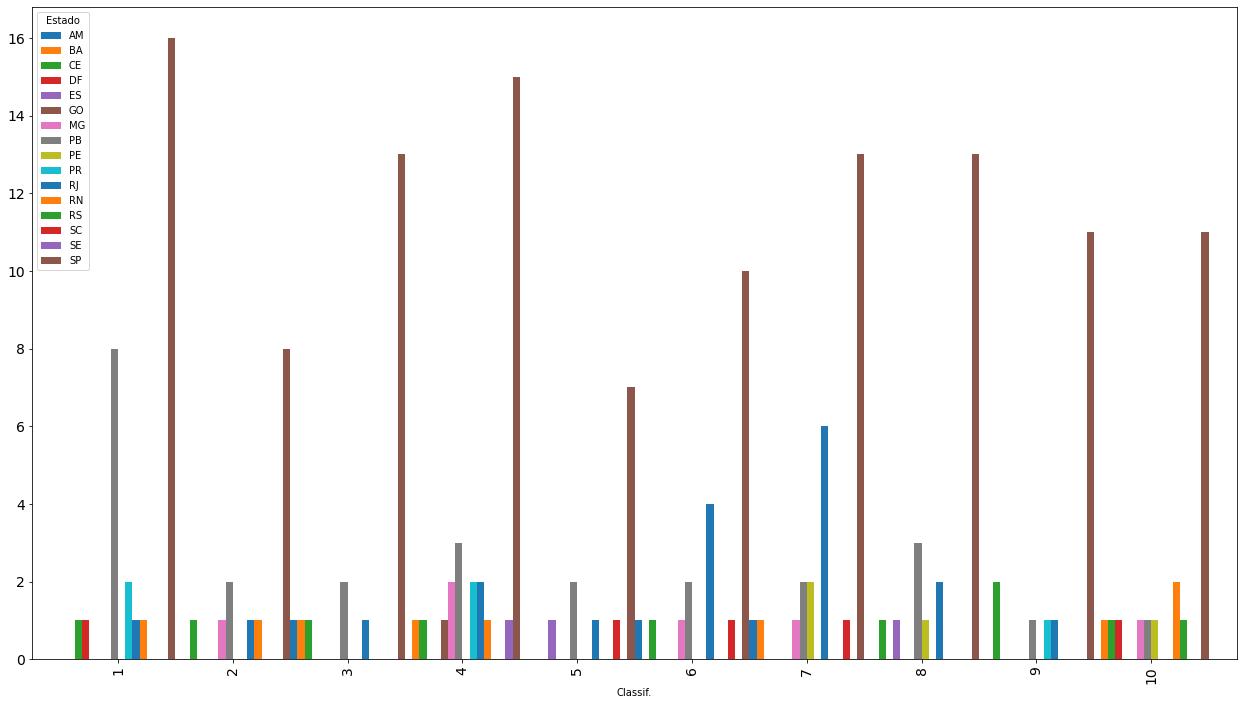

In [21]:
x.plot(kind="bar",figsize=(21.6, 12),width=1,fontsize=14)

<AxesSubplot:title={'center':'Classificação por Estado'}, xlabel='Posiçao', ylabel='Estado'>

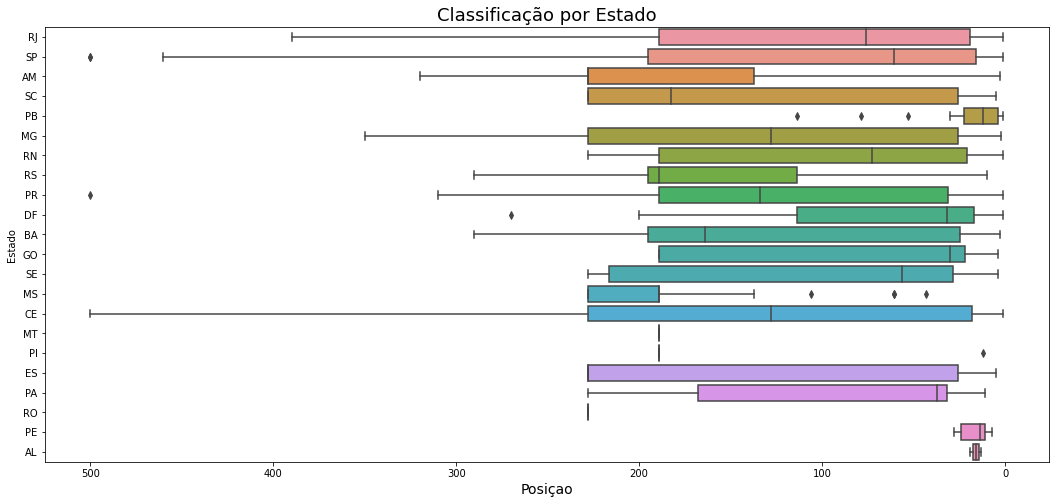

In [22]:
ax = sns.boxplot(x = 'Classif.',y='Estado', data = dados, orient='h')
ax.axes.invert_xaxis()
ax.figure.set_size_inches(18,8)
ax.set_title('Classificação por Estado', fontsize=18)
ax.set_xlabel('Posição',fontsize=14)
ax

<AxesSubplot:title={'center':'Classificação por Instituiçao em Minas'}, xlabel='Posicao', ylabel='Escola'>

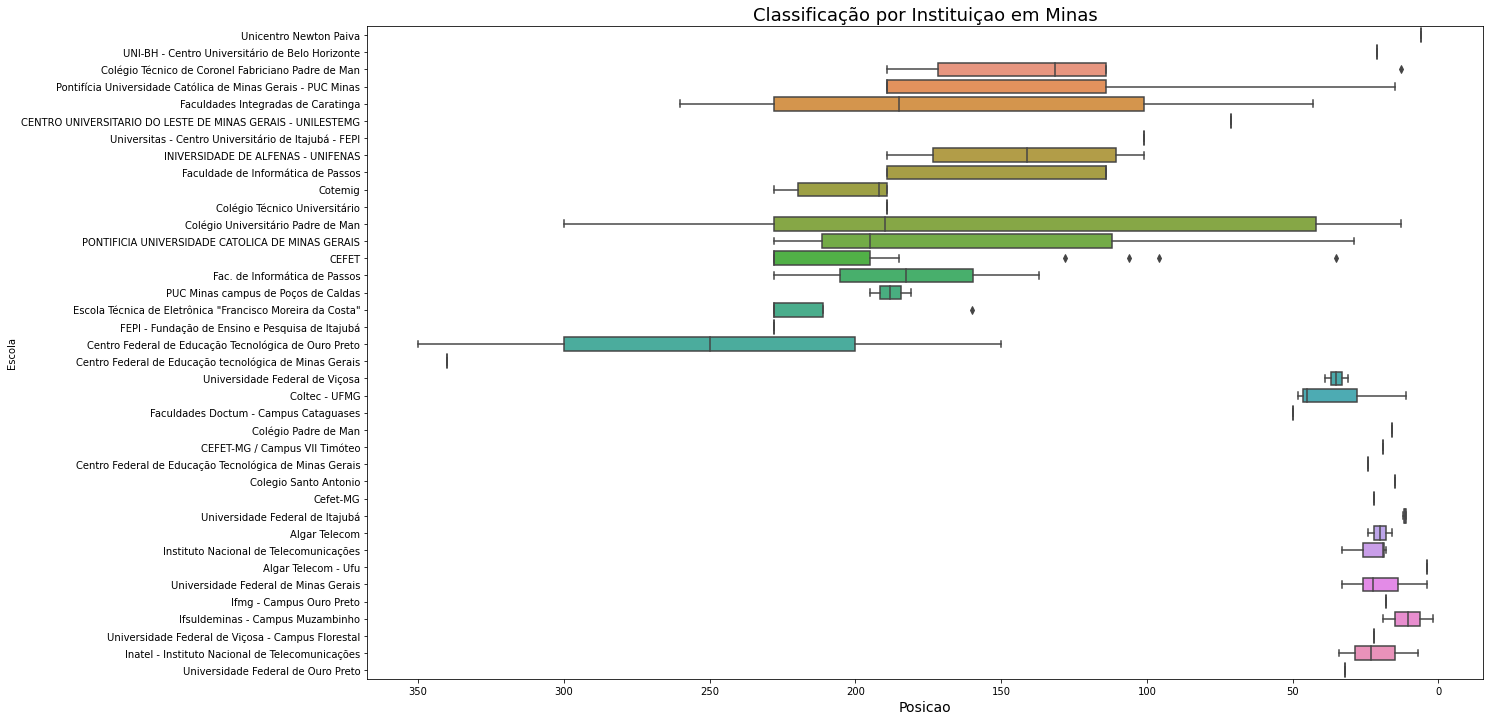

In [25]:
ax = sns.boxplot(x = 'Classif.',y='Escola', data = dados[dados.Estado == "MG"], orient='h')
ax.axes.invert_xaxis()
ax.figure.set_size_inches(20,12)
ax.set_title('Classificação por Instituiçao em Minas', fontsize=18)
ax.set_xlabel('Posição',fontsize=14)
ax

In [24]:
"""data = pd.DataFrame({"MG":dados['Classif.'][dados.Estado == "MG"],
"SP":dados['Classif.'][dados.Estado == "SP"],
"GO":dados['Classif.'][dados.Estado == "GO"],
"PI":dados['Classif.'][dados.Estado == "PI"],
"MT":dados['Classif.'][dados.Estado == "MT"],
"CE":dados['Classif.'][dados.Estado == "CE"],
"ES":dados['Classif.'][dados.Estado == "ES"],
"RO":dados['Classif.'][dados.Estado == "RO"],
"PE":dados['Classif.'][dados.Estado == "PE"],
"AL":dados['Classif.'][dados.Estado == "AL"],
"MS":dados['Classif.'][dados.Estado == "MS"],
"DF":dados['Classif.'][dados.Estado == "DF"],
"PR":dados['Classif.'][dados.Estado == "PR"],
"RS":dados['Classif.'][dados.Estado == "RS"],
"BA":dados['Classif.'][dados.Estado == "BA"],
"PA":dados['Classif.'][dados.Estado == "PA"],
"SE":dados['Classif.'][dados.Estado == "SE"],
"RN":dados['Classif.'][dados.Estado == "RN"],
"PB":dados['Classif.'][dados.Estado == "PB"],
"SC":dados['Classif.'][dados.Estado == "SC"],
"AM":dados['Classif.'][dados.Estado == "AM"],
"RJ":dados['Classif.'][dados.Estado == "RJ"]})
#ax = data.plot(figsize=(40, 20),lw=2, colormap='jet', marker='.', markersize=10, title='Video streaming dropout by category')
#ax.plot(figsize=(40, 20))
#ax.set_xlabel("x label")
#ax.set_ylabel("y label")
data"""

'data = pd.DataFrame({"MG":dados[\'Classif.\'][dados.Estado == "MG"],\n"SP":dados[\'Classif.\'][dados.Estado == "SP"],\n"GO":dados[\'Classif.\'][dados.Estado == "GO"],\n"PI":dados[\'Classif.\'][dados.Estado == "PI"],\n"MT":dados[\'Classif.\'][dados.Estado == "MT"],\n"CE":dados[\'Classif.\'][dados.Estado == "CE"],\n"ES":dados[\'Classif.\'][dados.Estado == "ES"],\n"RO":dados[\'Classif.\'][dados.Estado == "RO"],\n"PE":dados[\'Classif.\'][dados.Estado == "PE"],\n"AL":dados[\'Classif.\'][dados.Estado == "AL"],\n"MS":dados[\'Classif.\'][dados.Estado == "MS"],\n"DF":dados[\'Classif.\'][dados.Estado == "DF"],\n"PR":dados[\'Classif.\'][dados.Estado == "PR"],\n"RS":dados[\'Classif.\'][dados.Estado == "RS"],\n"BA":dados[\'Classif.\'][dados.Estado == "BA"],\n"PA":dados[\'Classif.\'][dados.Estado == "PA"],\n"SE":dados[\'Classif.\'][dados.Estado == "SE"],\n"RN":dados[\'Classif.\'][dados.Estado == "RN"],\n"PB":dados[\'Classif.\'][dados.Estado == "PB"],\n"SC":dados[\'Classif.\'][dados.Estado == "SC"],